## *📌 PCA Preparation*

In this step we are setting up our data for *Principal Component Analysis (PCA)*:  

1. Import the needed libraries:  
   - PCA from sklearn → for dimensionality reduction.  
   - matplotlib → for plotting.  
   - pandas, numpy → for data handling.  

2. Load the dataset:  
    The data (X = processed features, y = processed labels) comes from the *previous notebook* 
    where we applied cleaning and scaling. 

3. Goal: apply PCA to reduce dimensions of X and prepare it for *visualization* and further analysis.

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X = pd.read_csv("processed_X.csv")
y = pd.read_csv("processed_y.csv")

## *🔎 PCA with All Components*

Here we fit PCA using *all available components*:  

- pca_full = PCA() → create a PCA object without limiting the number of components.  
- X_pca_full → transformed version of X into principal components.  
- explained_variance → how much variance each principal component explains.  
- cumulative_variance → cumulative sum of explained variance to see how much total information is captured as we add more components.  

This helps us understand *how many components are needed* to represent most of the data’s variance.

In [2]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X)  # X = scaled features
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

## *📈 Cumulative Explained Variance Plot*

Now we visualize how much variance is captured as we increase the number of principal components:  

- The line shows the *cumulative explained variance*.  
- The red dashed line marks *90% variance*.  
- The green dashed line marks *95% variance*.  

This plot helps us decide the *optimal number of components* to keep while still preserving most of the information in the dataset.

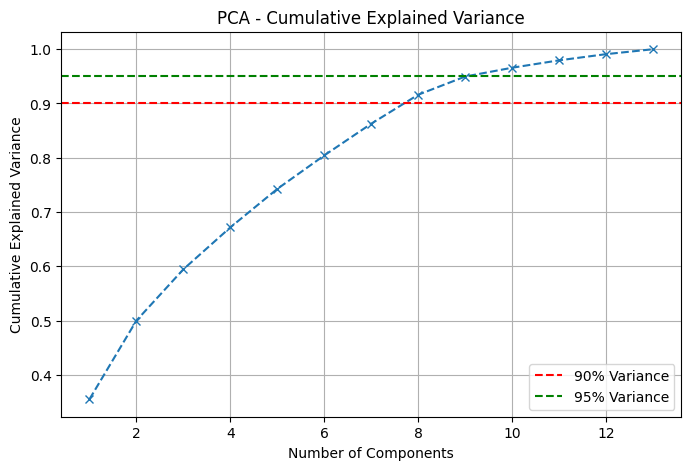

In [3]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance,
         marker='x', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance")
plt.axhline(y=0.95, color='g', linestyle='--', label="95% Variance")
plt.legend()
plt.grid(True)
plt.show()

## *📊 PCA Results*

In this step we checked how many components are needed to capture most of the variance:  

- PCA showed that to retain *90% variance, we need **10 components*.  
- For *95% variance, we need **12 components*.  
- After applying PCA with n_components=0.95, the dataset was reduced to shape *(303, 12)*.  

This means that instead of using all original features, we can safely work with only *12 principal components* 
while still keeping *95% of the data’s information*.

In [4]:
n90 = np.argmax(cumulative_variance >= 0.90) + 1
n95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components to retain 90% variance: {n90}")
print(f"Number of components to retain 95% variance: {n95}")

Number of components to retain 90% variance: 8
Number of components to retain 95% variance: 10


In [5]:
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X)
print(f"Shape after PCA (95% variance): {X_pca_95.shape}")

Shape after PCA (95% variance): (303, 10)


## *🎨 Visualization of First Two Principal Components*

Here we plot the data using the *first two principal components (PC1 & PC2)*:  

- Each point represents a sample from the dataset, projected into the new PCA space.  
- The color indicates the *target variable* (y).  
- This scatter plot helps us see whether the classes are somewhat separated in the reduced 2D space.  

Even though PCA is unsupervised, such plots give us an idea about the *structure and clustering* of the data.

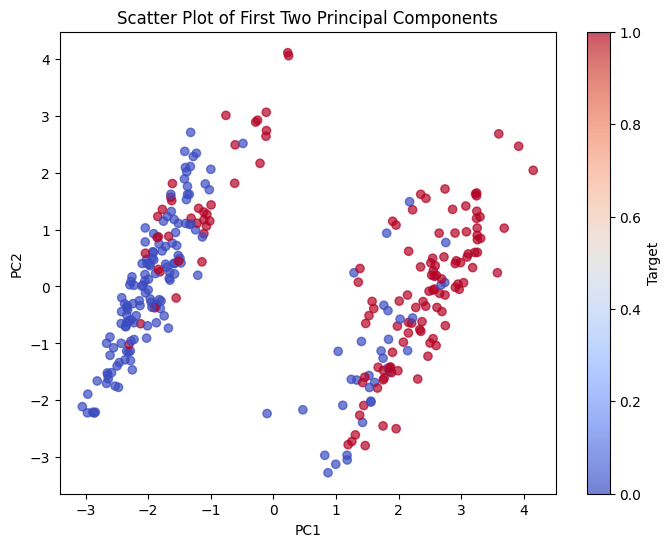

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca_full[:,0], X_pca_full[:,1], c=y.values.ravel(), cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter Plot of First Two Principal Components")
plt.colorbar(label="Target")
plt.show()

## *💾 Saving PCA-Transformed Data*

Finally, we save the processed data after PCA:  

- X_pca_95.csv → the features reduced to *95% variance* (12 components).  
- y_pca_95.csv → the corresponding target labels.

In [8]:
pd.DataFrame(X_pca_95).to_csv("../data/processed/X_pca_95.csv", index=False)
y.to_csv("../data/processed/y.csv", index=False)
